In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skd

# get transformed data
def getTransformedData(X_1, Y_1, X_2, Y_2, N, M):
    X_data = np.empty((0,M))
    X_data = np.vstack((X_data, transformClassData(X_1, Y_1, N, M), transformClassData(X_2, Y_2, N, M)))
    t_data = np.hstack(([0 for i in range(N)], [1 for i in range(N)]))
    return X_data, t_data

# transform data of one class
def transformClassData(X_1, X_2, N, M):
    res = np.empty((0,M))
    for i in range(N):
        res = np.vstack((res, getTransformedFeature(X_1[i], X_2[i], M)))
    return res

# transform each row of data
def getTransformedFeature(x_1, x_2, M):
    res = np.array([])
    count = 0
    exp_1 = 0
    exp_2 = 0
    while(True):
        res = np.append(res, (x_1**exp_1)*(x_2**exp_2))
        count += 1
        if (count == M):
            break
        else:
            exp_1 -= 1
            if (exp_1 == -1):
                exp_1 = exp_2 + 1
                exp_2 = 0
            else:
                exp_2 += 1
    return res

# calculate sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# gradient descent
def gradientDescent(X, t, w, N, M):
    for i in range(epoch):
        for j in range(N*2):
            predict = sigmoid(np.dot(w.reshape(1,M),X[j].reshape(M,1)))
            d_w = (predict - t[j])*X[j].reshape(M,1)
            w = w.reshape(M,1) - lr*d_w
    return w

# predict function
def predict(X, Y, w, M):
    res = np.empty((0,len(X[0])))
    for x,y in zip(X,Y):
        N = len(x)
        predict = np.dot(transformClassData(x, y, N, M).reshape(N,M), w.reshape(M,1)).reshape(1,N)
        res = np.vstack((res, predict))
    print(res.shape)
    return sigmoid(res) >= 0.5

# Simple Linear Classification

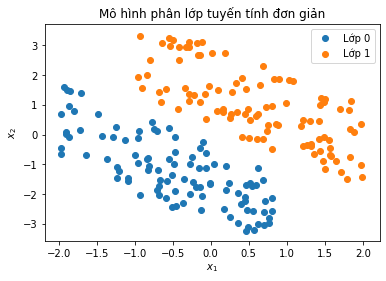

In [2]:
# data size (each)
N = 100

# numbers of feature
M = 3

# initialize w
w = np.array([0 for i in range(M)])

# learning rate
lr = 0.5

# epoch
epoch = 10

# get original data
X_1_data_1 = np.random.uniform(-2,1,N)
X_1_data_2 = -X_1_data_1 - np.random.uniform(0.2,3,N)
X_2_data_1 = np.random.uniform(-1,2,N)
X_2_data_2 = -X_2_data_1 + np.random.uniform(0.2,3,N)

# setting the plot
plt.title('Mô hình phân lớp tuyến tính đơn giản')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# plot the original data
plt.scatter(X_1_data_1, X_1_data_2, label='Lớp 0')
plt.scatter(X_2_data_1, X_2_data_2, label='Lớp 1')
plt.legend()
plt.show()

In [3]:
# transformed data
(X_data, t_data) = getTransformedData(X_1_data_1, X_1_data_2, X_2_data_1, X_2_data_2, N, M)

# gradient descent
last_w = gradientDescent(X_data, t_data, w, N, M)

print(last_w)

[[0.35966323]
 [6.86183951]
 [5.91416003]]


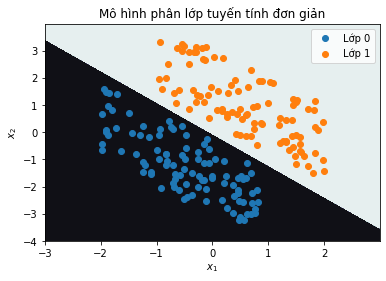

In [6]:
# plotting data
x = np.arange(-3, 3, 0.01)
y = np.arange(-4, 4, 0.01)
(xx, yy) = np.meshgrid(x, y)
z = predict(xx,yy,last_w,M)

# setting the plot
plt.title('Mô hình phân lớp tuyến tính đơn giản')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# plot the original data
plt.contourf(x,y,z,cmap=plt.cm.bone)
plt.scatter(X_1_data_1, X_1_data_2, label='Lớp 0')
plt.scatter(X_2_data_1, X_2_data_2, label='Lớp 1')
plt.legend()
plt.show()

# Nonlinear Classification

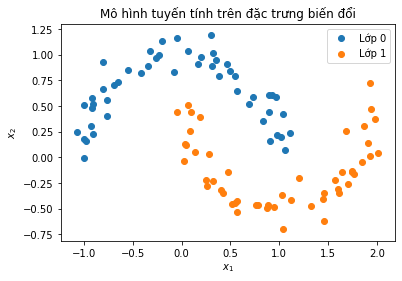

In [7]:
# data size
N_ = 100

# numbers of feature
M_ = 15

# initialize w
w_ = np.array([0 for i in range(M_)])

# get original data
(X_data_, t_data_) = skd.make_moons(n_samples=N_, noise=0.1)
X_1_data_ = X_data_[:,0]
X_2_data_ = X_data_[:,1]
idx_0 = np.where(t_data_ == 0)
idx_1 = np.where(t_data_ == 1)
X_1_data_1_ = X_1_data_[idx_0]
X_1_data_2_ = X_2_data_[idx_0]
X_2_data_1_ = X_1_data_[idx_1]
X_2_data_2_ = X_2_data_[idx_1]

# setting the plot
plt.title('Mô hình tuyến tính trên đặc trưng biến đổi')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# plot the original data
plt.scatter(X_1_data_1_, X_1_data_2_, label='Lớp 0')
plt.scatter(X_2_data_1_, X_2_data_2_, label='Lớp 1')
plt.legend()
plt.show()

In [8]:
# transformed data
(X_, t_) = getTransformedData(X_1_data_1_, X_1_data_2_, X_2_data_1_, X_2_data_2_, N_//2, M_)

# gradient descent
last_w_ = gradientDescent(X_, t_, w_, N_//2, M_)

print(last_w_)

[[ 3.96754949]
 [-0.59278808]
 [-3.48763187]
 [-8.10828701]
 [-2.00646271]
 [-0.74329011]
 [ 1.92090721]
 [-3.6739087 ]
 [ 0.32229481]
 [-1.92912278]
 [ 2.96723121]
 [-0.57211429]
 [-0.83253886]
 [-0.08572594]
 [-1.51627304]]


(400,)
(250,)
(250, 400)
(250, 400)
(250, 400)


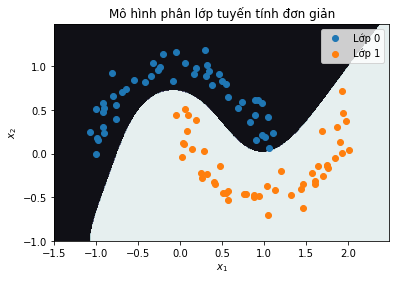

In [12]:
# plotting data
x_ = np.arange(-1.5, 2.5, 0.01)
y_ = np.arange(-1, 1.5, 0.01)
(xx_, yy_) = np.meshgrid(x_, y_)
print(x_.shape)
print(y_.shape)
print(xx_.shape)
print(yy_.shape)
z_ = predict(xx_,yy_,last_w_,M_)

# setting the plot
plt.title('Mô hình phân lớp tuyến tính đơn giản')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# plot the original data
plt.contourf(x_,y_,z_,cmap=plt.cm.bone)
plt.scatter(X_1_data_1_, X_1_data_2_, label='Lớp 0')
plt.scatter(X_2_data_1_, X_2_data_2_, label='Lớp 1')
plt.legend()
plt.show()